# E5-0 Simple Linear Regression Demo
This example demonstrates supervised machine learning by simple linear regression.

(Analysis + Dev Env) -> (Data Exploration and Pre-processing) -> Training  -> Testing -> (Validation with new data) 

## Step 1: Problem Analysis and Framing

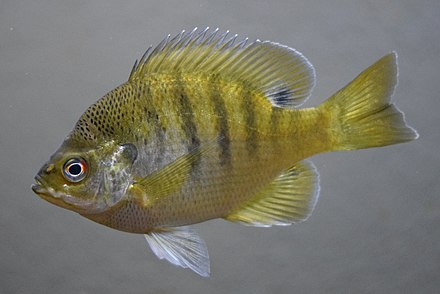

In [1]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

## Step 2: Data Preparation

### 2.1 Read data

In [2]:
# read the data
df = pd.read_csv("data/bluegills.txt", sep = '\t')

In [3]:
df.shape

(78, 2)

In [4]:
# see which are the attribute labels
list(df)

['age', 'length']

In [5]:
# get idea of the look
df

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


In [6]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     78 non-null     int64
 1   length  78 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


### 2.2 Get Asquainted with the Descriptive Statistics of Data

In [7]:
# get idea of basic statistical parameters for each column
df.describe()

,age,length
count,78.000000,78.000000
mean,3.628205,143.602564
std,0.927347,24.136699
min,1.000000,62.000000
25%,3.000000,137.250000
50%,4.000000,150.000000
75%,4.000000,160.000000
max,6.000000,188.000000


In [8]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

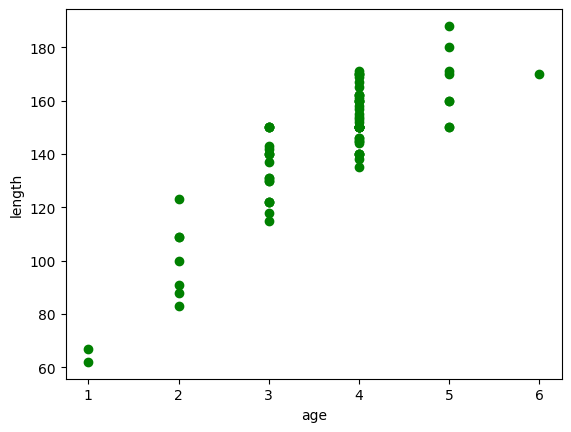

In [9]:
# plot all
plt.ylabel('length')
plt.xlabel('age')
plt.scatter(df.age, df.length, color='green')
plt.show()

C:\Users\Janus\AppData\Local\Temp\ipykernel_4260\3647010177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],  label='age', norm_hist=True)


<AxesSubplot: xlabel='age', ylabel='Density'>

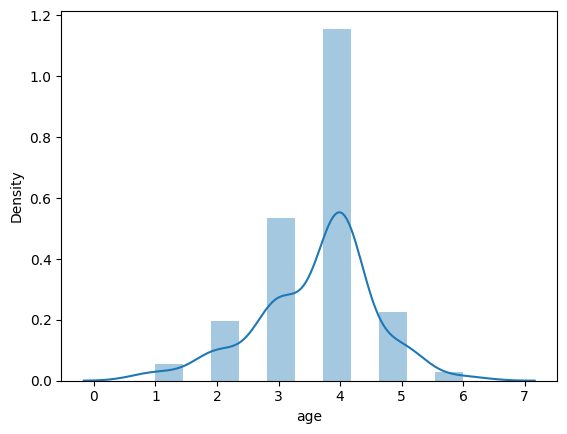

In [10]:
# sns.histplot(df['age'],  label='age')  
sns.distplot(df['age'],  label='age', norm_hist=True)  

C:\Users\Janus\AppData\Local\Temp\ipykernel_4260\1254366907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'],  label='length', norm_hist=True)


<AxesSubplot: xlabel='length', ylabel='Density'>

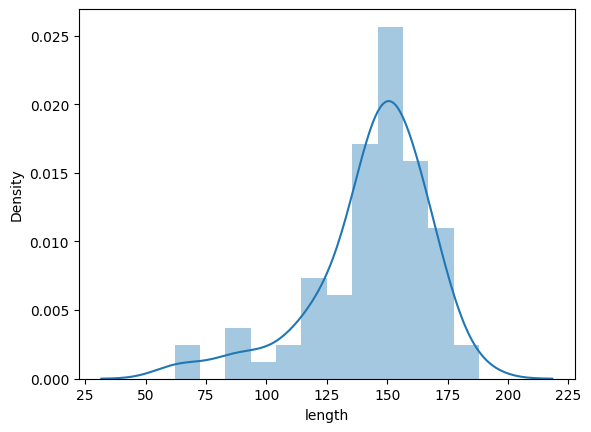

In [11]:
sns.distplot(df['length'],  label='length', norm_hist=True) 

### 2.3 Clean the Data

In [12]:
# to check null values in data
df.isnull().sum()

age       0
length    0
dtype: int64

<AxesSubplot: >

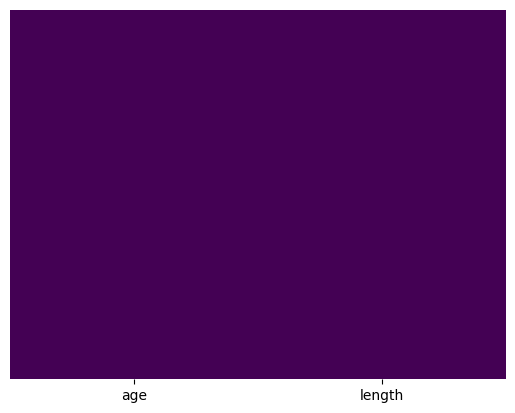

In [13]:
# same visualized
# makes sence if you have null values
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

Above representation shows that our data does not have any null values, so no further restoration is needed.

### 2.4 Investigate the Inter-Dependencies of the Features
Create a correlation matrix to see which features determine the output at most, as well as whether there are some correlated features. <br>
If two features are correlated, only one of them can represent both.

In [14]:
corr_matrix = df.corr()
corr_matrix

,age,length
age,1.000,0.857
length,0.857,1.000


<AxesSubplot: >

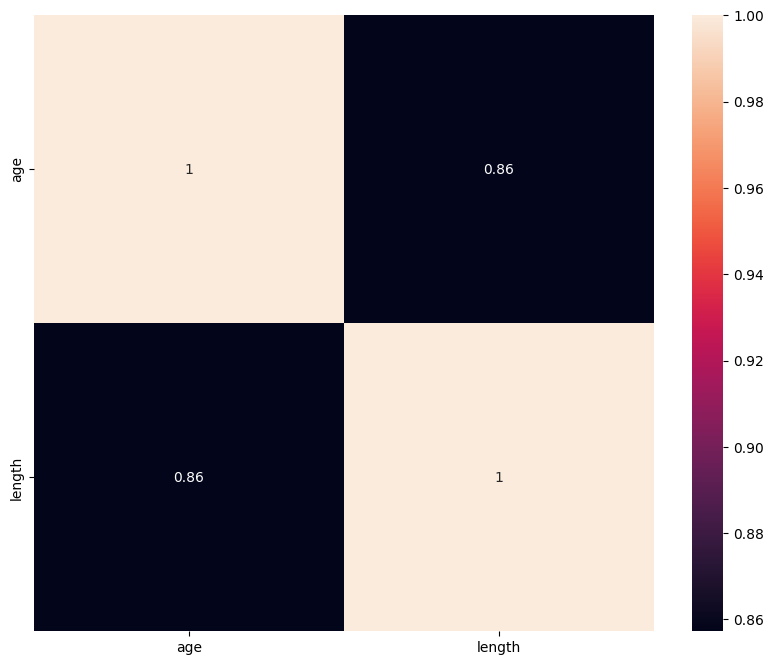

In [15]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

## Step 3: Train a Model

### 3.1 Method from _LinearRegression_

#### Split the Data in Dependent y and Independent X Data Sets

In [16]:
X = df['length'].values.reshape(-1, 1)
y = df['age'].values.reshape(-1, 1)

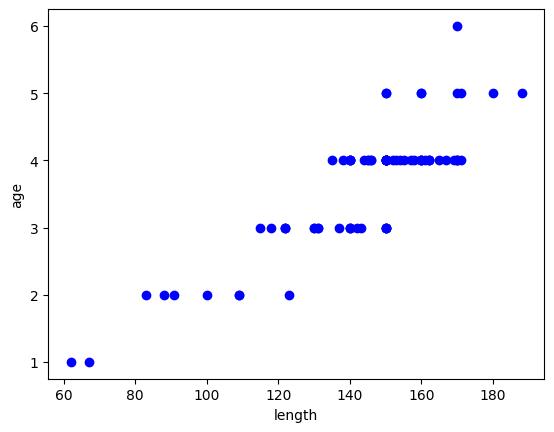

In [17]:
# plot all
plt.ylabel('age')
plt.xlabel('length')
plt.scatter(X, y, color='blue')
plt.show()

#### Split the Data in Training and Testing Sets

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [19]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(66, 1)
(66, 1)
(12, 1)
(12, 1)


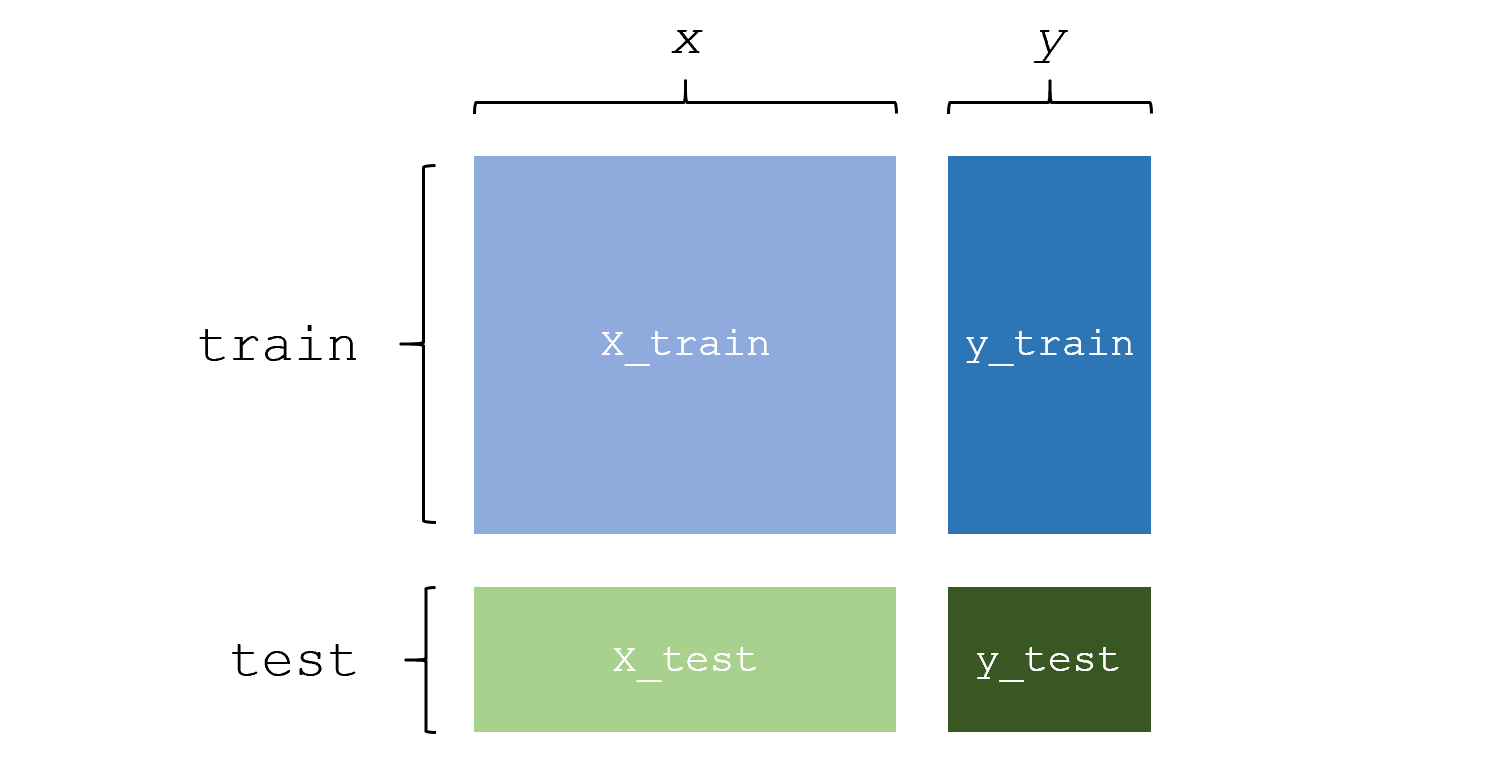

In [20]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [21]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

LinearRegression()

In [22]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [23]:
a

array([[0.03318805]])

In [24]:
b

array([-1.14026733])

In [25]:
y_predicted = myreg.predict(X_test)

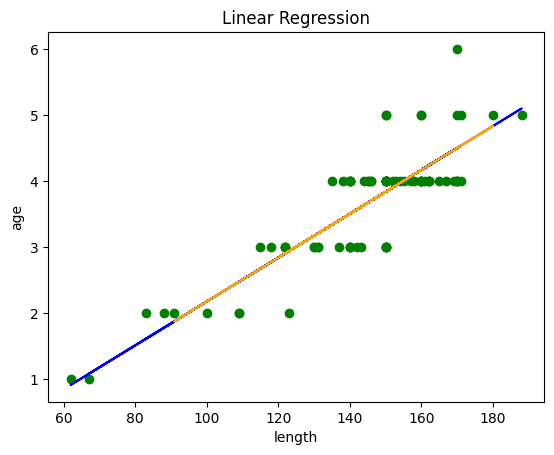

In [26]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()

In [27]:
R2 = myreg.score(X, y)
R2

0.7348313162026907

### 3.1 Method _polyfit_ from _numpy_

#### Split the Data in Dependent y and Independent X Data Sets

In [28]:
# Split X and y
X, y = df.length, df.age

#### Split the Data in Training and Testing Sets

In [29]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15) 

In [30]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(66,)
(66,)
(12,)
(12,)


In [31]:
# randomly selected
y_train

10    3
59    5
36    4
2     2
45    3
     ..
5     2
9     3
72    4
12    3
37    5
Name: age, Length: 66, dtype: int64

#### Train a Model

In [32]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [33]:
# get the result of fitting the regression line on the train data
model

array([ 0.03182301, -0.98849058])

In [34]:
a, b = model[0], model[1]

In [35]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

array([ 0.02962206, -0.33707865])

In [36]:
a1, b1 = test[0], test[1]

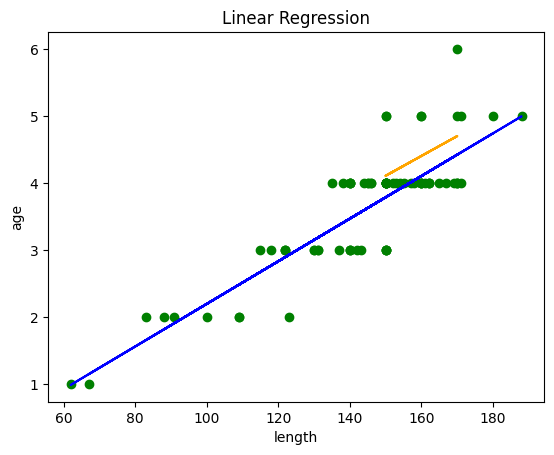

In [37]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.plot(X_train, a*X_train + b, color='blue')

plt.xlabel('length')
plt.ylabel('age')
plt.show()

We observe some differences between the two models.

## Step 4: Test the Models

### 4.1 Test with Known Data

In [38]:
age_predicted = myreg.predict([[160]])
age_predicted

array([[4.16982064]])

In [39]:
age_predict = a*160 + b
age_predict

4.1031906449031075

### 4.2 Predict with Unknown Data

In [40]:
# assume a new fish 
length = 91
age_predicted = myreg.predict([[length]])
age_predicted

array([[1.8798452]])

## Step 5: Model Evaluation 

We need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [41]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

0.8789959592016094


In [42]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

1.313571196172228


In [43]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

1.1461113367261613


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error
- **MSE** is more popular than MAE, because MSE "punishes" larger errors
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units

### Calculate R-squared

In [44]:
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  -1.18


In [45]:
# R-squared
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

-2.3777545044428723

This is bad result!

# Step 5: Store the Model

In [48]:
# Store the model in a file
model_file = 'deploy/mypolifit.pkl'

# Save now
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

In [49]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    mymodel = pickle.load(f)

In [50]:
# Test reading from the file
predict = np.poly1d(mymodel)
my_age_prediction = predict(91)
print(my_age_prediction)

1.9074031174141095


## Exercise
Your turn - analyse the house data

## Reference
https://www.kaggle.com/aniketg11/predicting-house-prices-through-regression/notebook <br>
https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>